### **Step 1: Consolidate and Import Data**

In [1]:
import pandas as pd

In [7]:
csv_files = [
    "Cycling Data/202106-divvy-tripdata.csv", "Cycling Data/202107-divvy-tripdata.csv",
    "Cycling Data/202108-divvy-tripdata.csv", "Cycling Data/202109-divvy-tripdata.csv",
    "Cycling Data/202110-divvy-tripdata.csv", "Cycling Data/202111-divvy-tripdata.csv",
    "Cycling Data/202112-divvy-tripdata.csv", "Cycling Data/202201-divvy-tripdata.csv",
    "Cycling Data/202202-divvy-tripdata.csv", "Cycling Data/202204-divvy-tripdata.csv",
    "Cycling Data/202205-divvy-tripdata.csv", "Cycling Data/202203-divvy-tripdata.csv"
]

In [8]:
def read_and_combine_data(file_paths):
    combined_data = pd.DataFrame()
    for file in file_paths:
        data = pd.read_csv(file)
        combined_data = pd.concat([combined_data, data], ignore_index = True)
    return combined_data

In [9]:
cyclistic_data = read_and_combine_data(csv_files)

### **Step 2: Preliminary Analysis**

In [10]:
print(cyclistic_data.info())
print(cyclistic_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860776 entries, 0 to 5860775
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 581.3+ MB
None
            ride_id  rideable_type           started_at             ended_at  \
0  99FEC93BA843FB20  electric_bike  2021-06-13 14:31:28  2021-06-13 14:34:11   
1  06048DCFC8520CAF  electric_bike  2021-06-04 11:18:02  2021-06-04 11:24:19   
2  9598066F68045DF2  electric_bike  2021-06-04 09:49:35  2021-06-04 09:55:34   
3  B03C0FE48C

### **Step 3: Data Cleaning**

In [11]:
#Checking for missing values
print(cyclistic_data.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    823167
start_station_id      823164
end_station_name      878338
end_station_id        878338
start_lat                  0
start_lng                  0
end_lat                 5036
end_lng                 5036
member_casual              0
dtype: int64


In [14]:
# Creating a copy of the DataFrame while dropping rows
cleaned_data = cyclistic_data.dropna(subset=['end_lat', 'end_lng']).copy()
print(cleaned_data.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    823167
start_station_id      823164
end_station_name      873302
end_station_id        873302
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64


### **Step 4: Data Analysis**

In [15]:
# Convert 'started_at' and 'ended_at' to datetime
cleaned_data['started_at'] = pd.to_datetime(cleaned_data['started_at'])
cleaned_data['ended_at'] = pd.to_datetime(cleaned_data['ended_at'])

# Calculate trip duration in minutes
cleaned_data['trip_duration'] = (cleaned_data['ended_at'] - cleaned_data['started_at']).dt.total_seconds() / 60

# Calculate average trip duration for each user type
average_duration = cleaned_data.groupby('member_casual')['trip_duration'].mean()
print(average_duration)

member_casual
casual    27.860459
member    12.789995
Name: trip_duration, dtype: float64


In [16]:
# Extract day of the week and hour of day from 'started_at'
cleaned_data['day_of_week'] = cleaned_data['started_at'].dt.day_name()
cleaned_data['hour_of_day'] = cleaned_data['started_at'].dt.hour

# Analyze frequency of trips by day of the week and hour of day for each user type
weekly_usage = cleaned_data.groupby(['day_of_week', 'member_casual']).size().unstack()
hourly_usage = cleaned_data.groupby(['hour_of_day', 'member_casual']).size().unstack()

print(weekly_usage)
print(hourly_usage)

member_casual  casual  member
day_of_week                  
Friday         359460  459652
Monday         301590  466000
Saturday       545241  440886
Sunday         469345  394560
Thursday       308131  501667
Tuesday        286622  524664
Wednesday      285398  512524
member_casual  casual  member
hour_of_day                  
0               53617   35374
1               38479   23293
2               26130   13578
3               14586    8023
4               10166    9082
5               13291   33159
6               27466   88800
7               50989  168002
8               68605  197593
9               78889  143209
10             106024  137773
11             137513  165031
12             161371  190288
13             171763  186790
14             176884  182937
15             189370  213215
16             206707  279262
17             237584  343854
18             215840  286436
19             168273  206215
20             123464  141430
21             105541  107981
22        

In [17]:
# Most frequently used start and end stations for each user type
top_start_stations = cleaned_data.groupby(['start_station_name', 'member_casual']).size().unstack().sort_values(by='casual', ascending=False)
top_end_stations = cleaned_data.groupby(['end_station_name', 'member_casual']).size().unstack().sort_values(by='casual', ascending=False)

print(top_start_stations.head())
print(top_end_stations.head())

member_casual                       casual   member
start_station_name                                 
Streeter Dr & Grand Ave            67291.0  16866.0
Millennium Park                    31865.0   9317.0
Michigan Ave & Oak St              29191.0  14781.0
DuSable Lake Shore Dr & Monroe St  24136.0   7258.0
Shedd Aquarium                     22826.0   4853.0
member_casual                        casual   member
end_station_name                                    
Streeter Dr & Grand Ave             69468.0  15296.0
Millennium Park                     32780.0   8912.0
Michigan Ave & Oak St               30640.0  13792.0
DuSable Lake Shore Dr & North Blvd  22400.0  13408.0
DuSable Lake Shore Dr & Monroe St   22257.0   7910.0


### **Step 5: Visualization**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns 

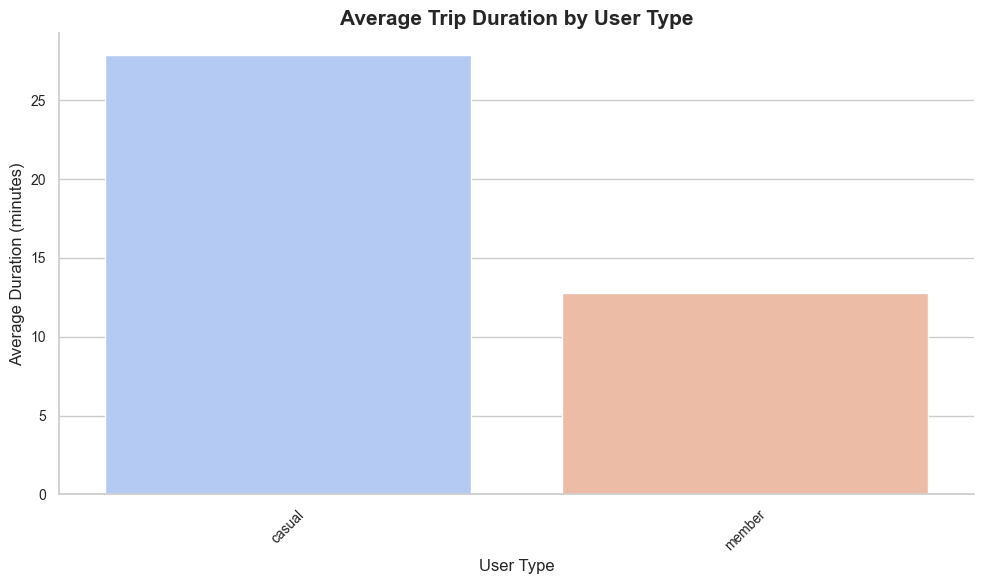

In [36]:
sns.set(style="whitegrid")

# Plotting the average trip duration for each user type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_duration.index, y=average_duration.values, palette="coolwarm", hue=average_duration.index, legend=False)
plt.title('Average Trip Duration by User Type', fontsize=15, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
sns.despine()  # Removes the top and right border
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

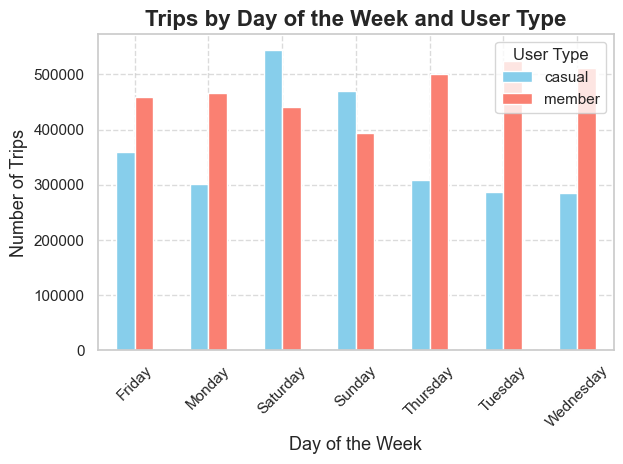

In [35]:
# Plotting the frequency of trips by day of the week for each user type
plt.figure(figsize=(12, 8))
weekly_usage.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Trips by Day of the Week and User Type', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=13)
plt.ylabel('Number of Trips', fontsize=13)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.legend(title='User Type', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

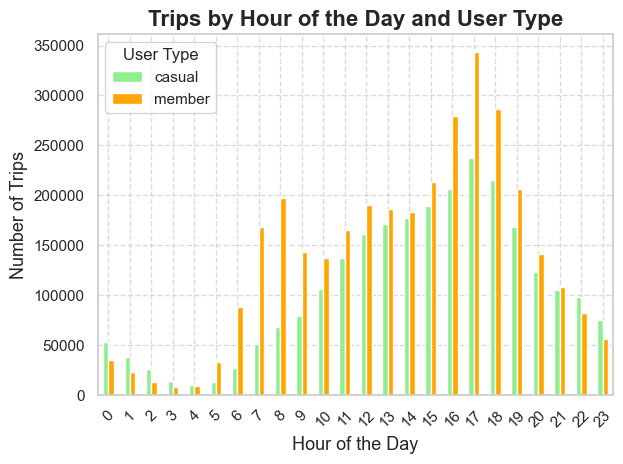

In [37]:
# Plotting the frequency of trips by hour of the day for each user type
plt.figure(figsize=(15, 8))
hourly_usage.plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Trips by Hour of the Day and User Type', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=13)
plt.ylabel('Number of Trips', fontsize=13)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.legend(title='User Type', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

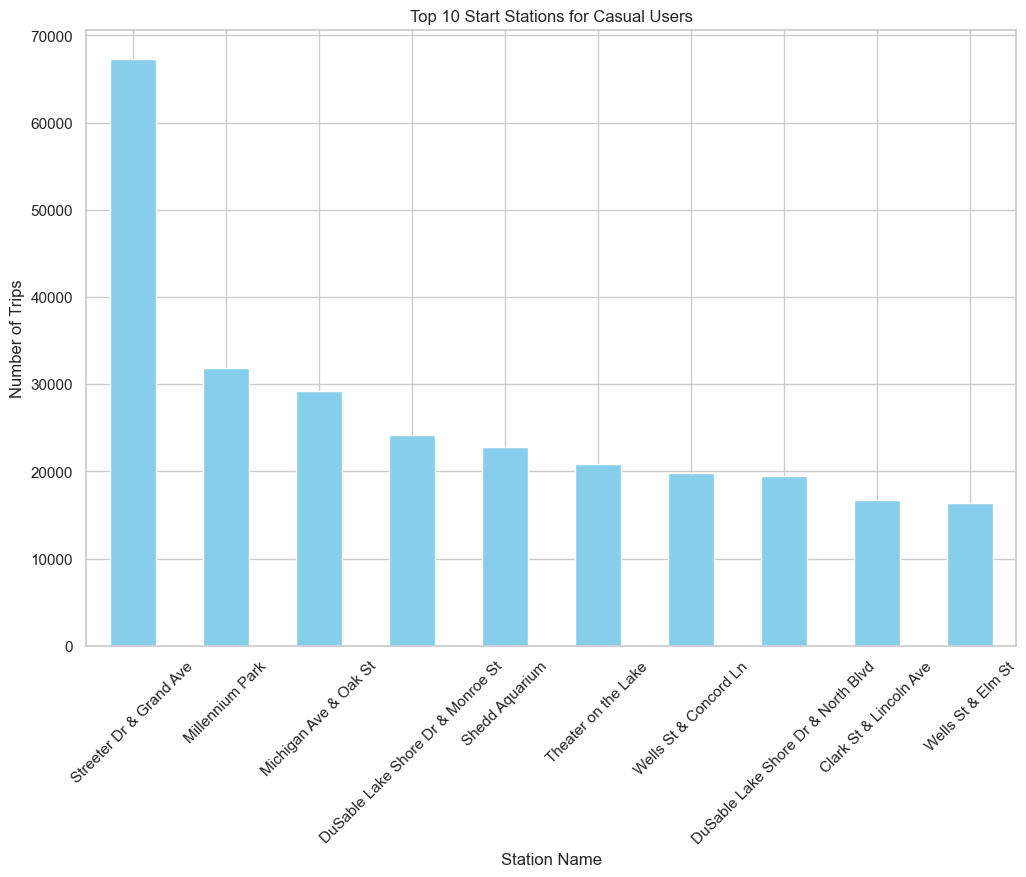

In [34]:
# Plotting the top start stations for casual users as an example
top_start_stations['casual'].head(10).plot(kind='bar', figsize=(12, 8), color="skyblue")
plt.title('Top 10 Start Stations for Casual Users')
plt.xlabel('Station Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()
